In [13]:
import pandas as pd 
import numpy as np

In [39]:
eers_df_raw = pd.read_csv("Architecture_EERs.csv")


# latex_code = eers_df.to_latex(caption="EER for Each User", label="tab:eers")
# print(latex_code)

# Transpose the DataFrame
eers_df = eers_df_raw.T

# Reset the column names after transpose (use the first row as the column headers)
eers_df.columns = eers_df.iloc[0]

# Now drop the user ids column
eers_df = eers_df[1:]

# Now, you can calculate summary statistics
summary_stats = eers_df.agg(['mean', 'median', 'std'])

# Print the summary statistics
print(summary_stats)

# latex_code = summary_stats.to_latex(caption="EER Summary for Classification Methods", label="tab:summary_stats")
# print(latex_code)


eers_df.columns

        MEMTO window sum:  MEMTO pointwise:  Anom-Trans window sum:  \
mean             0.494297          0.520838                0.528438   
median           0.518600          0.547200                0.505900   
std              0.125543          0.130220                0.104304   

        Anom-Trans pointwise:  
mean                 0.500024  
median               0.500000  
std                  0.001299  


Index(['MEMTO window sum:', 'MEMTO pointwise:', 'Anom-Trans window sum:',
       'Anom-Trans pointwise:'],
      dtype='object', name='User IDs:')

In [47]:

# Directly assign new column names
eers_df.columns = ['MEMTO Window', 'MEMTO Pointwise', 'AT Window', 'AT Pointwise']

# Print the updated DataFrame
print(eers_df.head())


   MEMTO Window  MEMTO Pointwise  AT Window  AT Pointwise
1        0.4746           0.5521     0.5059        0.5000
2        0.6164           0.3488     0.4885        0.5000
3        0.7454           0.5560     0.4375        0.5000
4        0.6420           0.6373     0.4238        0.5000
5        0.5427           0.6652     0.5835        0.5052


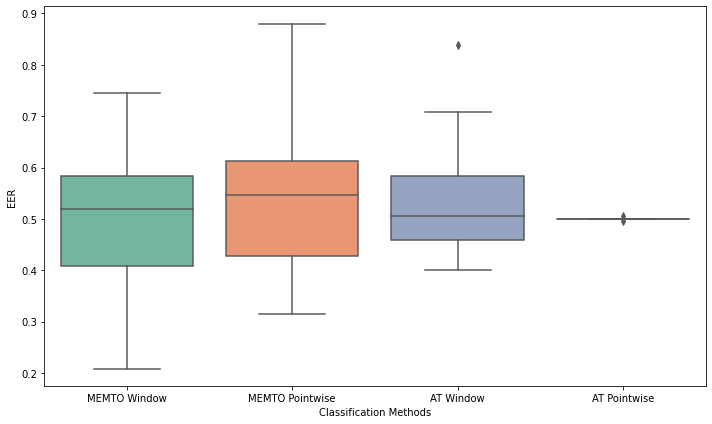

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting the boxplot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(data=eers_df, palette="Set2")

# Title and labels
plt.xlabel('Classification Methods')
plt.ylabel('EER')

# Display the plot
plt.tight_layout()  # This ensures the plot fits well within the window
plt.savefig('eers_boxplot.png')  # Save as PNG (you can change the format to .jpg or .pdf as needed)


plt.show()


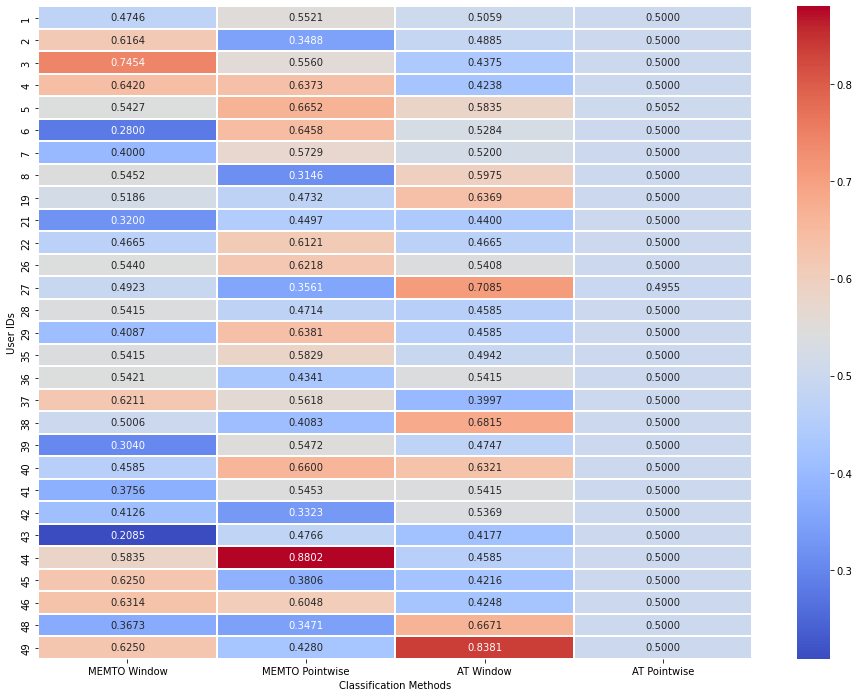

In [53]:

# # Transpose the DataFrame
# eers_df = eers_df_raw.T

# # Reset the column names after transpose (use the first row as the column headers)
# eers_df.columns = eers_df.iloc[0]
# eers_df = eers_df[1:]
# print(eers_df.head())

# eers_df.columns


import seaborn as sns
import matplotlib.pyplot as plt
# Convert all columns to numeric, forcing errors to NaN (if any non-numeric data exists)
eers_df = eers_df.apply(pd.to_numeric, errors='coerce')

# Handle NaN values (e.g., replace them with 0 or drop rows/columns containing NaN)
eers_df = eers_df.fillna(0)  # You can also use eers_df.dropna() to remove rows with NaN

# Now you can create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(eers_df, annot=True, cmap='coolwarm', cbar=True, fmt='.4f', linewidths=1)

# Add title and labels
# plt.title("EER Heatmap for Different Classification Methods")
plt.xlabel("Classification Methods")
plt.ylabel("User IDs")

# Save the plot as a PNG image
plt.savefig("eers_heatmap.png")

# Show plot
plt.show()


